#### smote + enn
          precision    recall  f1-score   support

          0       0.98      0.96      0.97      1920
          1       0.35      0.51      0.41        80

avg / total       0.95      0.94      0.95      2000

ACCURACY: 0.942

#### smote enn 결측치 2개 delete 했을 때

          precision    recall  f1-score   support

          0       0.98      0.95      0.96      1920
          1       0.28      0.51      0.37        80

avg / total       0.95      0.93      0.94      2000

ACCURACY: 0.929

#### ADASYN

          precision    recall  f1-score   support

          0       0.98      0.97      0.97      1920
          1       0.38      0.46      0.42        80

avg / total       0.95      0.95      0.95      2000

ACCURACY: 0.9485


#### Random oversampling
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1920
          1       0.30      0.65      0.41        80

avg / total       0.96      0.93      0.94      2000

ACCURACY: 0.9265


### 비식별처리 replace , fillna 해도 비식별처리로 인식됨

In [1]:
import pandas as pd
import numpy as np
import os
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import classification_report
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,normalize
from sklearn import preprocessing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('./train.csv',encoding='cp949')
df1 = pd.read_csv('./Test_set.csv',encoding='cp949')
df1.AGE.value_counts(0)

50    382
45    374
55    322
40    309
35    214
60    191
30     92
65     68
25     53
20      5
70      5
*       4
Name: AGE, dtype: int64

In [3]:
df1.SEX.value_counts(0)

2    1110
1     905
*       4
Name: SEX, dtype: int64

In [4]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 48 , 40 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 15 }
    )

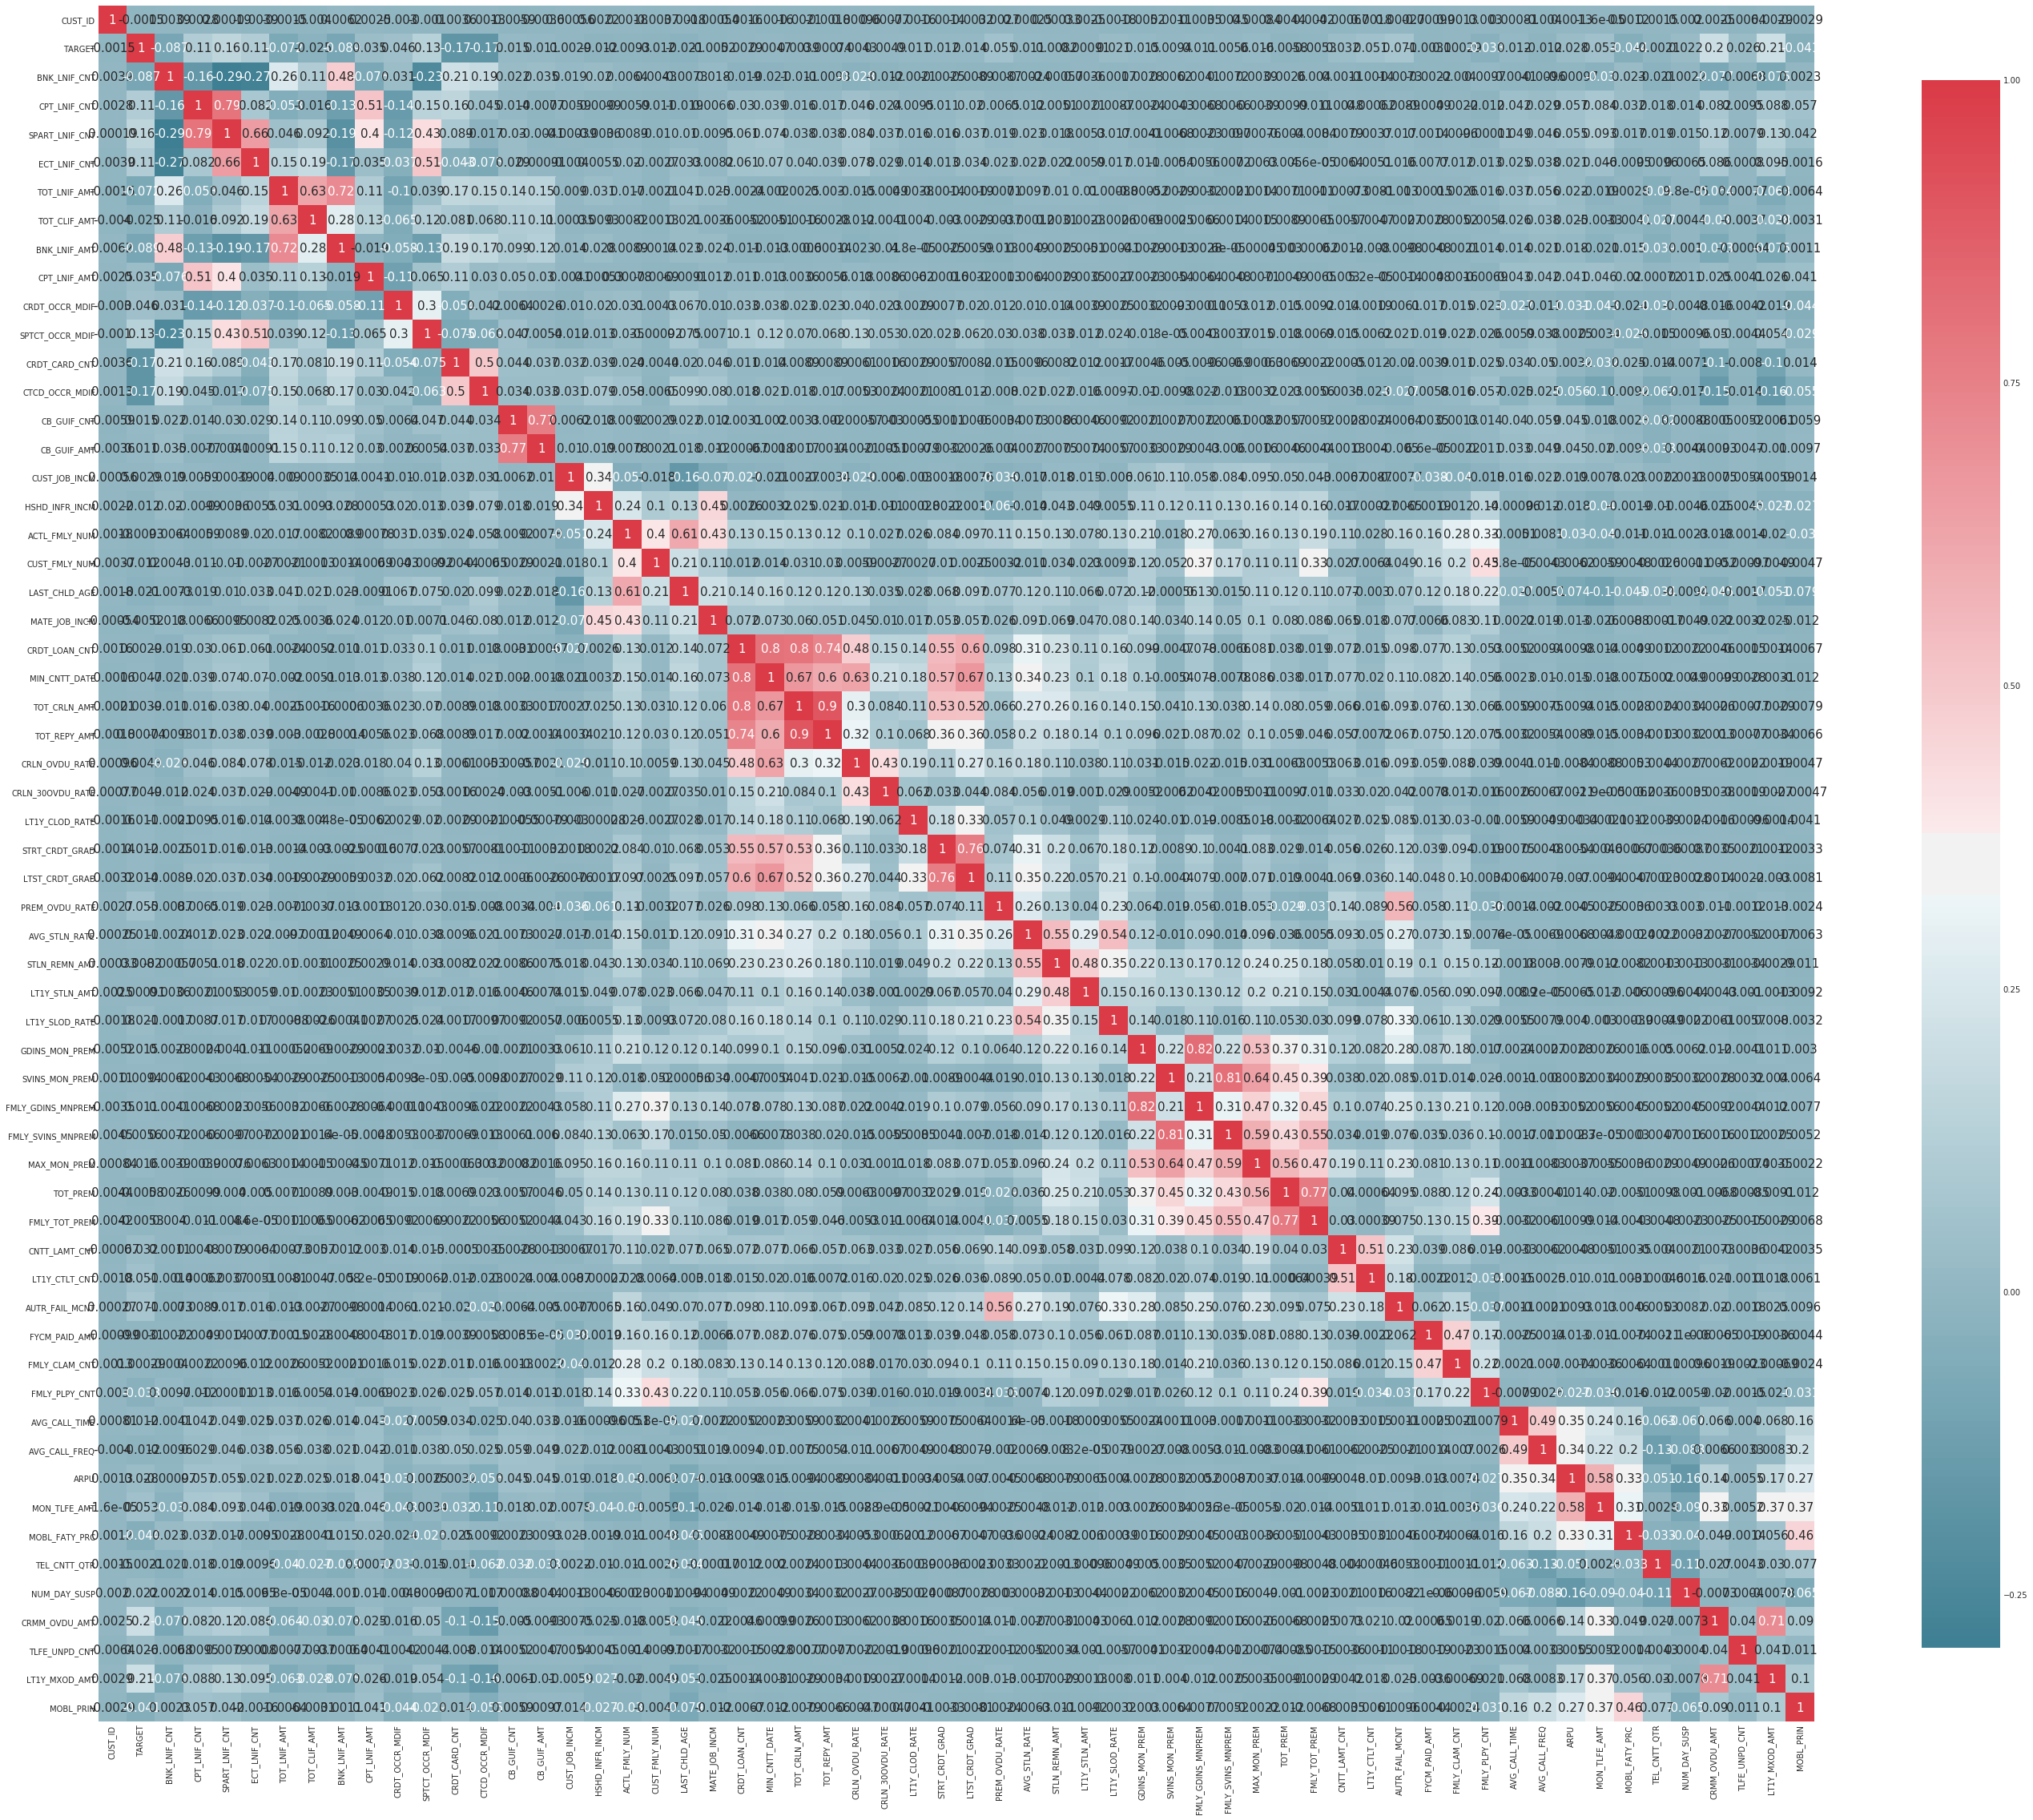

In [5]:
plot_correlation_map( df )

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100233 entries, 0 to 100232
Data columns (total 69 columns):
CUST_ID              100233 non-null int64
TARGET               100233 non-null int64
BNK_LNIF_CNT         100233 non-null int64
CPT_LNIF_CNT         100233 non-null int64
SPART_LNIF_CNT       100233 non-null int64
ECT_LNIF_CNT         100233 non-null int64
TOT_LNIF_AMT         100233 non-null int64
TOT_CLIF_AMT         100233 non-null int64
BNK_LNIF_AMT         100233 non-null int64
CPT_LNIF_AMT         100233 non-null int64
CRDT_OCCR_MDIF       100233 non-null int64
SPTCT_OCCR_MDIF      100233 non-null int64
CRDT_CARD_CNT        100233 non-null int64
CTCD_OCCR_MDIF       100233 non-null int64
CB_GUIF_CNT          100233 non-null int64
CB_GUIF_AMT          100233 non-null int64
OCCP_NAME_G          99769 non-null object
CUST_JOB_INCM        100233 non-null int64
HSHD_INFR_INCM       100233 non-null int64
ACTL_FMLY_NUM        100233 non-null int64
CUST_FMLY_NUM        100233 n

In [7]:
df.isnull().sum()

CUST_ID                  0
TARGET                   0
BNK_LNIF_CNT             0
CPT_LNIF_CNT             0
SPART_LNIF_CNT           0
ECT_LNIF_CNT             0
TOT_LNIF_AMT             0
TOT_CLIF_AMT             0
BNK_LNIF_AMT             0
CPT_LNIF_AMT             0
CRDT_OCCR_MDIF           0
SPTCT_OCCR_MDIF          0
CRDT_CARD_CNT            0
CTCD_OCCR_MDIF           0
CB_GUIF_CNT              0
CB_GUIF_AMT              0
OCCP_NAME_G            464
CUST_JOB_INCM            0
HSHD_INFR_INCM           0
ACTL_FMLY_NUM            0
CUST_FMLY_NUM            0
LAST_CHLD_AGE         1027
MATE_OCCP_NAME_G     45709
MATE_JOB_INCM            0
CRDT_LOAN_CNT            0
MIN_CNTT_DATE            0
TOT_CRLN_AMT             0
TOT_REPY_AMT             0
CRLN_OVDU_RATE           0
CRLN_30OVDU_RATE         0
                     ...  
GDINS_MON_PREM           0
SVINS_MON_PREM           0
FMLY_GDINS_MNPREM        0
FMLY_SVINS_MNPREM        0
MAX_MON_PREM             0
TOT_PREM                 0
F

In [8]:
df.AGE

df.AGE = df.AGE.replace('*',0)
df.AGE = pd.Series(df.AGE).convert_objects(convert_numeric=True)
df.AGE = df.AGE.replace(0,df.AGE.mean())
df.AGE


/home/kimjihee/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


0         50.000000
1         50.000000
2         60.000000
3         35.000000
4         45.000000
5         45.000000
6         40.000000
7         60.000000
8         40.000000
9         40.000000
10        55.000000
11        40.000000
12        25.000000
13        40.000000
14        25.000000
15        30.000000
16        55.000000
17        60.000000
18        45.000000
19        50.000000
20        35.000000
21        35.000000
22        46.187533
23        46.187533
24        55.000000
25        50.000000
26        60.000000
27        60.000000
28        45.000000
29        30.000000
            ...    
100203    50.000000
100204    30.000000
100205    35.000000
100206    50.000000
100207    60.000000
100208    55.000000
100209    45.000000
100210    55.000000
100211    50.000000
100212    55.000000
100213    60.000000
100214    30.000000
100215    45.000000
100216    35.000000
100217    35.000000
100218    50.000000
100219    55.000000
100220    40.000000
100221    50.000000


In [9]:

df.AGE.value_counts(0)

45.000000    19052
50.000000    17734
55.000000    15321
40.000000    14807
35.000000    12003
60.000000     9190
30.000000     5268
65.000000     3584
25.000000     2201
46.187533      430
70.000000      403
20.000000      240
Name: AGE, dtype: int64

In [10]:
df.SEX
df.SEX = df.SEX.replace('*',1)
df.SEX = pd.Series(df.SEX).convert_objects(convert_numeric=True)
df.SEX

/home/kimjihee/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


0         1
1         1
2         2
3         1
4         1
5         1
6         2
7         1
8         2
9         1
10        2
11        1
12        2
13        1
14        2
15        1
16        2
17        2
18        2
19        2
20        1
21        2
22        1
23        1
24        1
25        2
26        2
27        1
28        2
29        1
         ..
100203    2
100204    2
100205    2
100206    2
100207    1
100208    1
100209    2
100210    2
100211    2
100212    2
100213    2
100214    1
100215    2
100216    1
100217    1
100218    2
100219    1
100220    2
100221    2
100222    1
100223    1
100224    1
100225    1
100226    1
100227    1
100228    2
100229    2
100230    1
100231    1
100232    2
Name: SEX, Length: 100233, dtype: int64

In [11]:
df.TEL_CNTT_QTR = df.TEL_CNTT_QTR.astype(str)

In [13]:
df.TEL_CNTT_QTR

0         20111
1         20143
2         20103
3         20144
4         20131
5         20154
6         20143
7         20021
8         20131
9         20133
10        20062
11        20133
12        20141
13        20151
14        20144
15        20142
16        20092
17        20102
18        20142
19        20143
20        20131
21        20122
22        20114
23        20102
24        20101
25        20112
26        20121
27        20143
28        20122
29        20133
          ...  
100203    20124
100204    20103
100205    20123
100206    20142
100207    20132
100208    20114
100209    20084
100210    20161
100211    20151
100212    20121
100213    20074
100214    20114
100215    20141
100216    20134
100217    20142
100218    20134
100219    20002
100220    20041
100221    20141
100222    20161
100223    20151
100224    20124
100225    20144
100226    20133
100227    20094
100228    20111
100229    20134
100230    20141
100231    20103
100232    20151
Name: TEL_CNTT_QTR, Leng

In [14]:
df.PAYM_METD = df.PAYM_METD.fillna('O')
df.TEL_MBSP_GRAD = df.TEL_MBSP_GRAD.fillna('R')
df.MATE_OCCP_NAME_G = df.MATE_OCCP_NAME_G.fillna('주부')
df.OCCP_NAME_G = df.OCCP_NAME_G.fillna('주부')
df.LAST_CHLD_AGE = df.LAST_CHLD_AGE.fillna(df.LAST_CHLD_AGE.mean())

In [15]:
del df['CUST_ID']
df = pd.get_dummies(df)

In [16]:
df_test = df[:2000]
df_train = df[2000:]

In [17]:
x_data = df_train.drop('TARGET',axis=1)
y_data = df_train.TARGET

In [18]:
X = x_data
y = y_data
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import CondensedNearestNeighbour 

# undersampling
# cnn = CondensedNearestNeighbour(random_state=42) 
# X_resampled, y_resampled = cnn.fit_sample(X, y)

#RANDOM 
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_sample(X, y)

#ADASYN
# ada = ADASYN(random_state=42,n_neighbors=3)
# X_resampled, y_resampled = ada.fit_sample(X, y)

# Apply SMOTE + ENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(X, y)

In [19]:
df_1 = pd.DataFrame(X_resampled)
df_2 = pd.DataFrame(y_resampled)
df_2.columns = ['TARGET']
df_final = pd.concat([df_1,df_2],axis=1)
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,396,397,398,399,400,401,402,403,404,TARGET
0,0.0,0.0,1.0,1.0,48001.0,48001.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,2.0,0.0,0.0,0.0,48001.0,1.0,48001.0,0.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,9001.0,9001.0,9001.0,0.0,25.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,2.0,0.0,0.0,0.0,39001.0,39001.0,39001.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,0.0,0.0,0.0,1.0,132001.0,132001.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [20]:
df_final = df_final.sample(frac=1)
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,396,397,398,399,400,401,402,403,404,TARGET
62831,1.00000,2.00000,2.000000,0.000000,42001.000000,39001.000000,33001.000000,6001.000000,13.000000,13.000000,...,0.0,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
129533,1.00000,0.00000,0.407397,0.407397,14611.802065,14611.802065,2389.905154,0.000000,39.222482,2.648078,...,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
5427,0.00000,0.00000,1.000000,1.000000,57001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
60009,2.00000,1.00000,2.000000,1.000000,117001.000000,15001.000000,105001.000000,3001.000000,1.000000,1.000000,...,0.0,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
87947,1.71732,0.71732,1.717320,1.000000,33064.714525,11545.122346,24912.755307,2152.676538,9.607837,33.607837,...,0.0,0.28268,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [21]:
train_y = df_final.TARGET
train_x = df_final.drop('TARGET',axis=1)

In [22]:
test_y = df_test.TARGET
test_x = df_test.drop('TARGET',axis=1)

In [23]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,5))
train_x = min_max_scaler.fit_transform(train_x)
test_x = min_max_scaler.fit_transform(test_x)

In [24]:
from sklearn import linear_model
reg = linear_model.LogisticRegression()
reg.fit(train_x,train_y)
score = reg.score(test_x,test_y)
print('Logistic Regression Accuracy : ',score)

Logistic Regression Accuracy :  0.828


In [25]:
from sklearn.metrics import classification_report
print(classification_report(test_y,reg.predict(test_x)))

             precision    recall  f1-score   support

          0       0.99      0.83      0.90      1920
          1       0.16      0.79      0.27        80

avg / total       0.96      0.83      0.88      2000



In [26]:
reg2 = linear_model.LogisticRegression(class_weight='balanced')
reg2.fit(train_x,train_y)
score2 = reg2.score(test_x,test_y)
print('Logistic Regression used class weight ' ,score2)
print(classification_report(test_y,reg2.predict(test_x)))

Logistic Regression used class weight  0.849
             precision    recall  f1-score   support

          0       0.99      0.85      0.92      1920
          1       0.18      0.75      0.28        80

avg / total       0.96      0.85      0.89      2000



In [27]:
# fit model no training data
model = XGBClassifier(learning_rate=0.2,max_depth=7,base_score=0.5,max_delta_step=0,n_estimators=100)

pipe = Pipeline([['xg',MinMaxScaler(feature_range=(0,5))],['model',model]])
pipe.fit(train_x,train_y)
print(classification_report(test_y,pipe.predict(test_x)))
print("ACCURACY:",pipe.score(test_x,test_y))

             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1920
          1       0.29      0.50      0.37        80

avg / total       0.95      0.93      0.94      2000

ACCURACY: 0.932


In [28]:
a = '123123'
print(a[:-3])

123
